In [31]:
# Refer the “Engine.csv” and observe the dataset and decide type of Regression.
# Datasets provide fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
# Predict the Co2emission for with given fuel consumption ratings CYLINDERS, ENGINESIZE, FUELCONSUMPTION_COMB.
# Predict the Co2emission where the ENGINESIZE is 2.0, CYLINDERS is 4, UELCONSUMPTION_COMB is 8.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [33]:
df=pd.read_csv("Engine.csv")
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [34]:
print(df.info())
print(df.describe())
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB
None
        ENGINESIZE    CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
count  1067.000000  1067.000000           1067.000000   1067.000000
mean      3.346298     5.794752             11.580881    256.228679
std       1.415895     1.797447              3.485595     63.372304
min       1.000000     3.000000              4.700000    108.000000
25%       2.000000     4.000000              9.000000    207.000000
50%       3.400000     6.000000             10.900000    251.000000
75%       4.300000     8.000000             13.350000   

In [35]:
X=df.drop(['CO2EMISSIONS'],axis=1)
Y=df["CO2EMISSIONS"]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=12345)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print(model.predict([[2,4,8]]))
y_pred=model.predict(x_test)

[194.16114535]


/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"mean absolute error: {mae:.2f}")
print(f"mean squared error: {mse:.2f}")
print(f"root mean squarred error: {rmse:.2f}")
print(f"r2 score = {r2:.2f}")

mean absolute error: 16.30
mean squared error: 496.30
root mean squarred error: 22.28
r2 score = 0.88


In [38]:
from sklearn.decomposition import PCA

# create an object of PCA
pca=PCA(n_components=1)
# fit the data
reduced_X=pca.fit_transform(X)
reduced_X

array([[-3.79168404],
       [-2.71515023],
       [-6.1940583 ],
       ...,
       [ 0.15905663],
       [-0.2084253 ],
       [ 1.08550161]])

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(reduced_X,Y)

LinearRegression()

TypeError: 'data' must be pandas DataFrame object, not: <class 'list'>

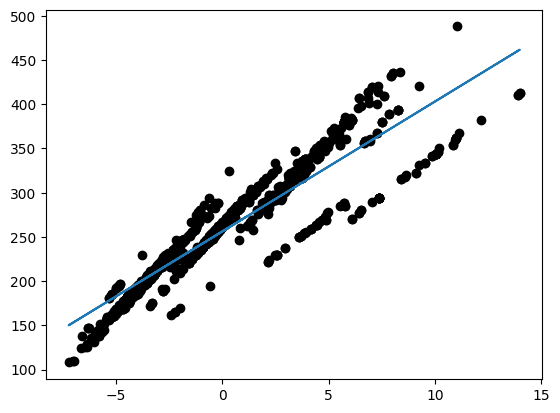

In [45]:
plt.scatter(reduced_X,Y,color='black')
y_pred=model.predict(reduced_X)
plt.plot(reduced_X,y_pred)


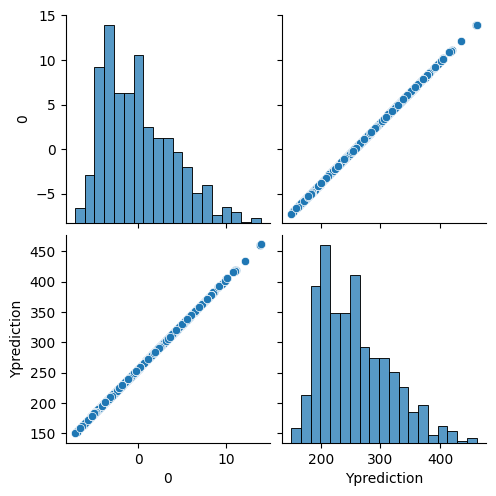

In [47]:
new_df=pd.DataFrame(reduced_X)
new_df["Yprediction"]=y_pred
sbn.pairplot(new_df)

In [48]:
new_df.corr()

,0,Yprediction
0,1.0,1.0
Yprediction,1.0,1.0
